In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_splitimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# load the data
employee_data = pd.read_csv("train.csv")

# print the first 5 rows
# print(employee_data.head())
# print headers
print(employee_data.columns)

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')


# EDA - Exploratory Data Analysis

In [27]:
# print the shape of the data
print(employee_data.shape)
# print the data types
# print(employee_data.dtypes)
# print the summary statistics
print(employee_data.describe())

(1677, 35)
                id          Age    DailyRate  DistanceFromHome    Education  \
count  1677.000000  1677.000000  1677.000000       1677.000000  1677.000000   
mean    838.000000    36.036971   892.749553          8.683959     2.937984   
std     484.252517     8.507112   374.496259          7.826143     1.039078   
min       0.000000    18.000000   107.000000          1.000000     1.000000   
25%     419.000000    30.000000   589.000000          2.000000     2.000000   
50%     838.000000    35.000000   890.000000          7.000000     3.000000   
75%    1257.000000    41.000000  1223.000000         12.000000     4.000000   
max    1676.000000    60.000000  3921.000000         29.000000    15.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1677.0              1677.000000  1677.000000     1677.000000   
mean             1.0                 2.757901    67.798450        2.782349   
std              0.0                 1.0868

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

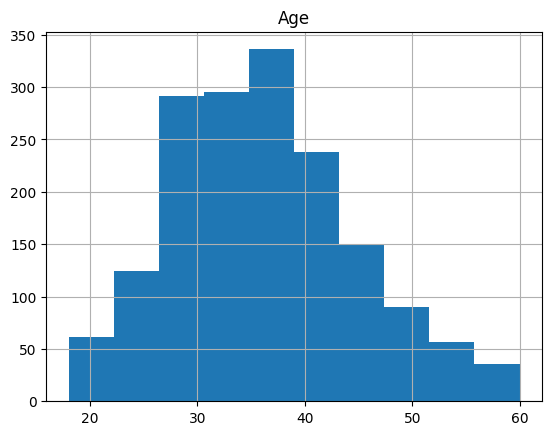

In [19]:
# questions
# Age distribution show in a histogram
employee_data.hist(column="Age")


In [ ]:
# show a plot of the correlation between every column against Attrition
for column in employee_data.columns:
    if column != "Attrition":
        employee_data.plot.scatter(x=column, y="Attrition")

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

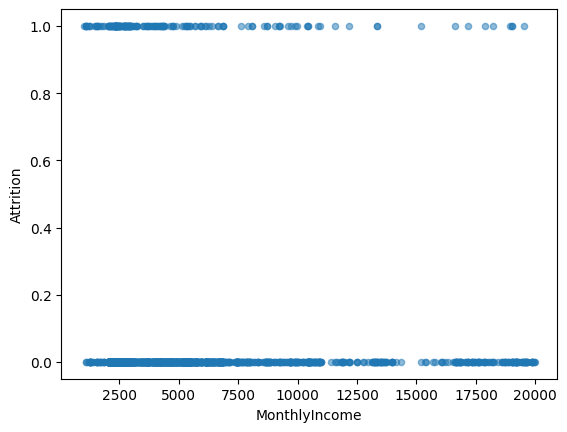

In [16]:
# show a plot of the correlation between MonthlyIncome against Atrrition 
#  change the form of the dots, adding transparency to allow for overlaps to be visible
employee_data.plot.scatter(x="MonthlyIncome", y="Attrition", alpha=0.5)

<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

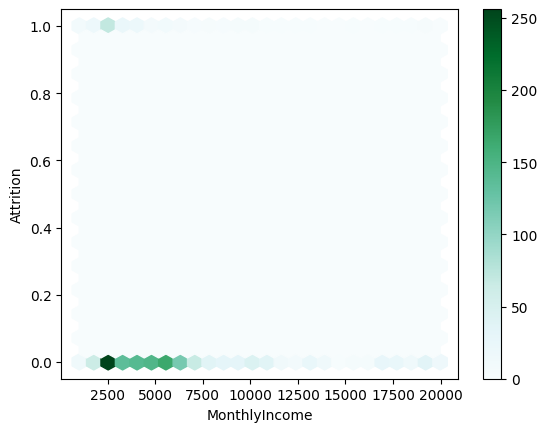

In [17]:
# show a plot of the correlation between MonthlyIncome against Atrrition 
# 2-d histograms.
employee_data.plot.hexbin(x="MonthlyIncome", y="Attrition", gridsize=25)


In [29]:
# sample only a subset of data points: a random selection of points of MonthlyIncome
print(len(employee_data))
employee_data2 = employee_data.sample(frac=0.01, replace=False, random_state=1)
print(len(employee_data2))


1677
17


<Axes: xlabel='MonthlyIncome', ylabel='Attrition'>

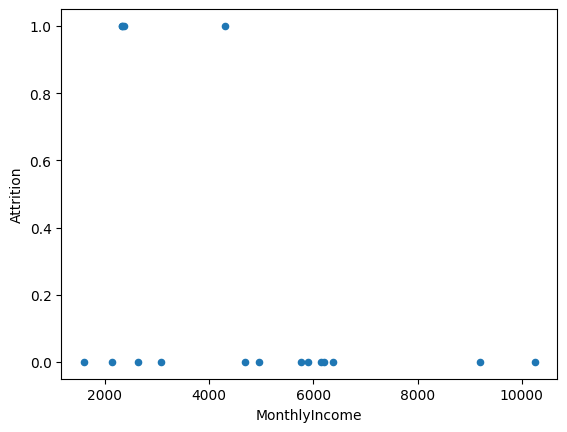

In [31]:
employee_data2.plot.scatter(x="MonthlyIncome", y="Attrition")

0    1477
1     200
Name: Attrition, dtype: int64


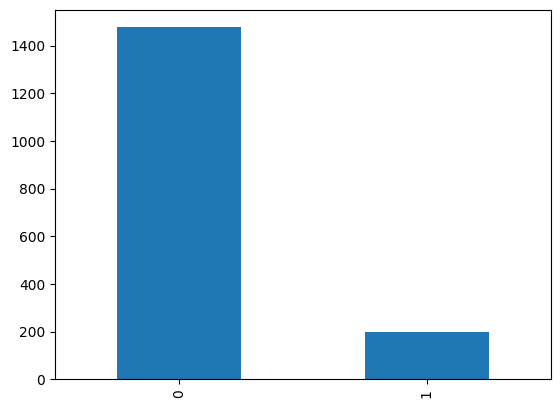

In [23]:
# Attrition count
employee_data["Attrition"].value_counts().plot(kind="bar")
# print numers
print(employee_data["Attrition"].value_counts())

In [24]:
# attrition rate
print(employee_data["Attrition"].value_counts() / len(employee_data))

0    0.880739
1    0.119261
Name: Attrition, dtype: float64


<Axes: title={'center': 'Age'}, xlabel='Attrition'>

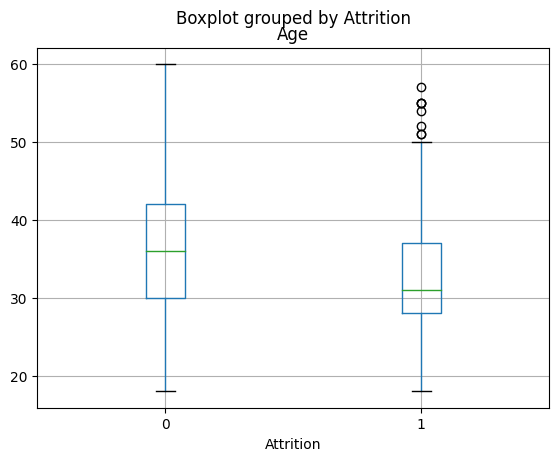

In [31]:
# attition by age , x = age, y = attrition
employee_data.boxplot(column="Age", by="Attrition")


Attrition
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: Age, dtype: object

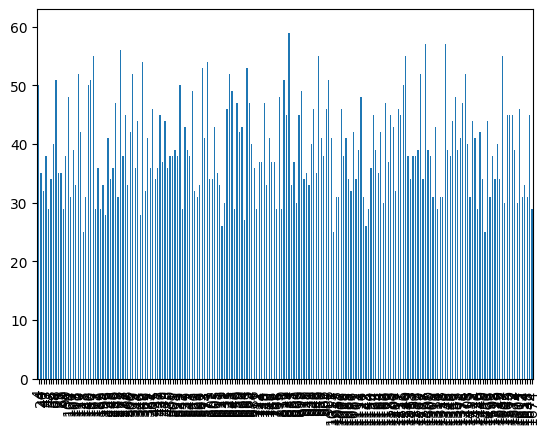

In [32]:
# plot bar attition by age , x = age, y = attrition
employee_data.groupby("Attrition")["Age"].plot(kind="bar")


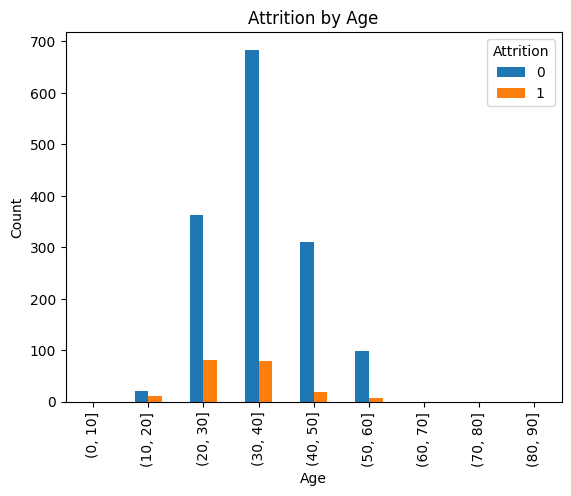

In [49]:
# Create age groups
age_groups = pd.cut(employee_data['Age'], np.arange(0, 100, 10))

# Group the data by age groups and attrition
age_att_count = employee_data.groupby([age_groups, 'Attrition']).size().unstack()

# Plot the bar chart
ax = age_att_count.plot(kind='bar')

# Set the plot labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Attrition by Age')
plt.show()


Attrition           0   1
EducationField           
Human Resources    10   3
Life Sciences     687  88
Marketing         126  26
Medical           486  63
Other              76   6
Technical Degree   92  14


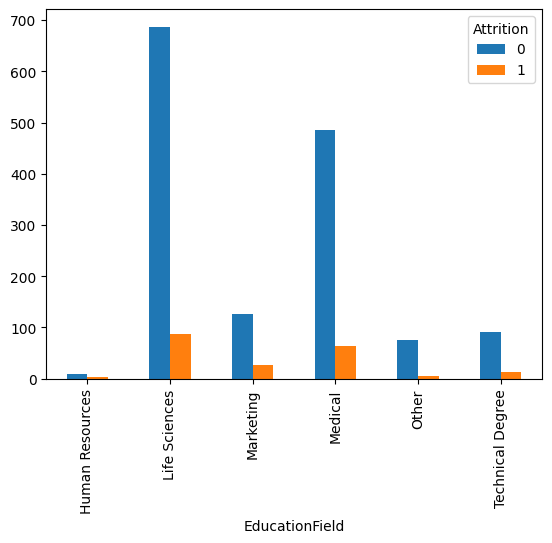

In [59]:
# number of people by EducationField and attrition [0,1]
employee_data.groupby(["EducationField", "Attrition"]).size().unstack().plot(kind="bar")

# show me the numbers
print(employee_data.groupby(["EducationField", "Attrition"]).size().unstack())

group1 = employee_data.groupby(["EducationField", "Attrition"]).size().unstack()

# save as csv
# group1.to_csv("eda/employee_data.csv")

In [61]:
# get the % of group 1
group1["% 0"] = group1[0] / (group1[0] + group1[1])
group1["% 1"] = group1[1] / (group1[0] + group1[1])

print(group1)

Attrition           0   1       % 0       % 1
EducationField                               
Human Resources    10   3  0.769231  0.230769
Life Sciences     687  88  0.886452  0.113548
Marketing         126  26  0.828947  0.171053
Medical           486  63  0.885246  0.114754
Other              76   6  0.926829  0.073171
Technical Degree   92  14  0.867925  0.132075
